In [13]:
from pint.models import get_model
from pint.simulation import make_fake_toas_fromtim
from pint.logging import setup as setup_log
from pint.fitter import Fitter

from io import StringIO
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import corner

from joblib import delayed, Parallel

In [2]:
setup_log(level="WARNING")

1

In [3]:
m = get_model("sim2.par")

In [17]:
def simulate_and_measure():
    setup_log(level="WARNING")
    
    t = make_fake_toas_fromtim("sim2.tim", m, add_noise=True, add_correlated_noise=True)
    
    ftr = Fitter.auto(t, m)
    ftr.fit_toas()

    print(
        ftr.model.EFAC1.value, 
        ftr.model.EFAC1.uncertainty_value, 
        ftr.model.ECORR1.value, 
        ftr.model.ECORR1.uncertainty_value
    )

    return (
        ftr.model.EFAC1.value, 
        ftr.model.EFAC1.uncertainty_value, 
        ftr.model.ECORR1.value, 
        ftr.model.ECORR1.uncertainty_value
    )

In [16]:
results = Parallel(n_jobs=4)(delayed(simulate_and_measure)() for _ in range(4))

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [ ]:
m.EFAC1.value, m.ECORR1.value

In [4]:
efac_vals = []
ecorr_vals = []
efac_errs = []
ecorr_errs = []

for idx in range(500):
    

05101520253035404550556065707580859095100105110115120125130135140145150155160165170175180185190195200205210215220225230235240245250255260265270275280285290295300305310315320325330335340345350355360365370375380385390395400405410415420425430435440445450455460465470475480485490495

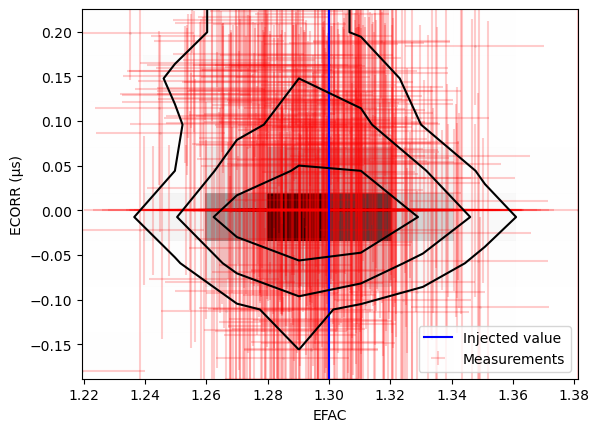

In [7]:
plt.errorbar(x=efac_vals, y=ecorr_vals, xerr=efac_errs, yerr=ecorr_errs, ls="", 
             label="Measurements", alpha=0.2, color="red")
plt.axvline(m.EFAC1.value, color="blue")
plt.axhline(m.ECORR1.value, color="blue", label="Injected value")
corner.hist2d(np.array(efac_vals), np.array(ecorr_vals), bins=8, smooth=0.7)
plt.xlabel("EFAC")
plt.ylabel("ECORR (μs)")
plt.legend()
plt.savefig("sim2-multisim.pdf")

In [18]:
m.EFAC1.value

1.3

In [9]:
corner.hist2d?

Signature:
corner.hist2d(
    x,
    y,
    bins=20,
    range=None,
    axes_scale=['linear', 'linear'],
    weights=None,
    levels=None,
    smooth=None,
    ax=None,
    color=None,
    quiet=False,
    plot_datapoints=True,
    plot_density=True,
    plot_contours=True,
    no_fill_contours=False,
    fill_contours=False,
    contour_kwargs=None,
    contourf_kwargs=None,
    data_kwargs=None,
    pcolor_kwargs=None,
    new_fig=True,
    force_range=False,
    **kwargs,
)
Docstring:
Plot a 2-D histogram of samples.

Parameters
----------
x : array_like[nsamples,]
   The samples.

y : array_like[nsamples,]
   The samples.

axes_scale : iterable (2,)
    Scale (``"linear"``, ``"log"``) to use for each dimension.

quiet : bool
    If true, suppress warnings for small datasets.

levels : array_like
    The contour levels to draw.

ax : matplotlib.Axes
    A axes instance on which to add the 2-D histogram.

plot_datapoints : bool
    Draw the individual data points.

plot_density : b